# Sequence Modeling

## Introduction to RNN

**Sequential vs Temporal Data**

* **Sequential data** refers to data that has an ordered relationship between elements. In other words, each element in the sequence has a specific position or ordering and the order matters. For instance, the sequence of words in a sentence, the sequence of observations in a time series, the sequence of characters in a string, or the sequence of frames in a video can all be considered as examples of sequential data.

* **Temporal data** specifically refers to data that is indexed by time. This means that the data has a time stamp or a time component associated with each observation. Temporal data can be used to describe a wide range of phenomena, such as the temperature of a city over the course of a year, the stock prices of a company over several years, or the heartbeat of a patient over time.

* Sequential data and temporal data are often used interchangeably, but they can be thought of as slightly different concepts. For example, written text data is considered sequential data but it is not temporal data. Also, all temporal data is considered to be sequential but not all sequential data is temporal.

In [ ]:
import tensorflow as tf
from tensorflow.keras import layers, Sequential

* RNN makes use of "memory" within the hidden layers
* In a feed-forward network, the hidden layers take input only from previous layers and pass output only to subsequent layers.
* An RNN has a layer in which the output from that layer is also passed back to itself for subsequent passes through the network. In this way, RNNs can be thought of as having "memory" of previous data.

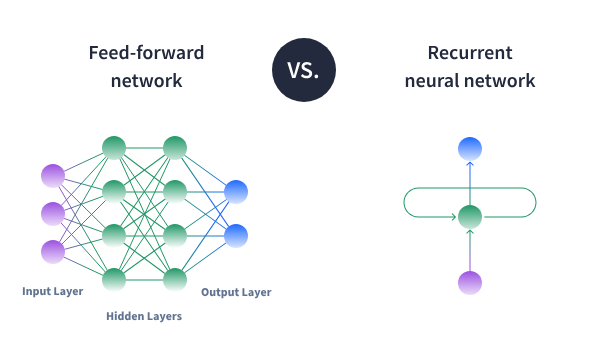

**Input Shape**

* Since we'll pass in the data in the form of sequences, we'll need to specify the number of timesteps (the length of these sequences, or the steps of memory) as part of the input shape in addition to the number of features or variables at a given timestep.
* **Ref:** In fyp ts data, we used 28 as `num_timesteps`. features can be feul price that day and other factors that vary each day (i.e, vary each timestep)
* We set `input_shape=(num_timesteps, num_features)` and that `num_timesteps` is equal to the length of the sequences we are feeding into our model.
* An example of using a `SimpleRNN` layer as the first layer in our model with 2 timesteps, 3 features per timestep, and 5 nodes in the recurrent layer itself:

In [ ]:
model.add(tf.keras.layers.SimpleRNN(5, input_shape=(2, 3))

In [ ]:
# SimpleRNN
model = Sequential()
model.add(layers.SimpleRNN(10, input_shape=(4,6), activation='relu')) # 4 steps of memory, 6 features per timestep, and 10 nodes
model.add(layers.Dense(10, activation='relu'))
model.add(layers.Dense(2))
model.compile(optimizer='sgd', loss='mean_squared_error')
model.summary()

* The three built-in RNN layers available in Keras are SimpleRNN, GRU & LSTM.
* It is also possible to create **custom recurrent layers** using Keras's `tf.keras.layers.RNN` class

In [ ]:
# LSTM
model = Sequential()
model.add(layers.LSTM(10, input_shape=(4,6), activation='relu')) # 4 steps of memory, 6 features per timestep, and 10 nodes
model.add(layers.Dense(10, activation='relu'))
model.add(layers.Dense(2))
model.compile(optimizer='adam', loss='mean_squared_error')
model.summary()

It can be seen that the LSTM has 4 times the parameters RNN (due to addition of 3 gates).

* Convolution layers and recurrent layers are not mutually exclusive.
* It's possible to combine recurrent layers with convolutional layers in the same model. It is also possible to do convolutional transformations within a recurrent layer like LSTM.
* Both of these techniques can bring together the benefits from convolutional layers of improved image processing with the memory and temporal strengths of RNNs. This type of implementation is typically used for processing video or other more advanced applications.
* The difference between using convolutional layers on their own and using them in conjunction with an RNN is that the **latter requires us to wrap them in a `TimeDistributed` layer**.
* When we're adding a `TimeDistributed` layer, the `input_shape` specified will change and should be of the form `(timesteps, ...)` where `timesteps` is the number of timesteps in our data, and the ... should match the input_shape of the layer we're wrapping with `TimeDistributed`.
* This is because the `TimeDistributed` layer expects input data to have one additional dimension: a time dimension.

In [ ]:
model.add(tf.keras.layers.TimeDistributed(tf.keras.layers.Conv2D(32, 3, activation='relu'), input_shape=(timesteps, 16, 10, 3)))
model.add(tf.keras.layers.TimeDistributed(tf.keras.layers.MaxPooling2D()))
model.add(tf.keras.layers.TimeDistributed(tf.keras.layers.Flatten()))

* In this example, timesteps is the number of timesteps in our sequence, and `16, 10, 3` is the shape of a single step in the sequence. So when using `TimeDistributed`, we need to modify `input_shape` to include the timesteps, i.e, `(timestep, 16, 10, 3)`
* When wrapping a layer in a `TimeDistributed` layer, we need to take care that we are passing the `input_shape` argument to the `TimeDistributed` layer and not the layer it is wrapping around (`Conv2d` in this case).
* Note that we do not need to wrap the `LSTM` layer itself or any subsequent layers in `TimeDistributed`.

In [ ]:
# combination of lstm and cnn
# When adding a convolutional layer to a model, we often add three separate layers, one after the other: a Conv layer, a MaxPooling layer, and a Flatten layer.
model = Sequential()
model.add(tf.keras.layers.TimeDistributed(tf.keras.layers.Conv2D(64, 2, activation='relu'), input_shape=(8, 12, 9, 1)))
# (12, 9, 1) is the shape of a single step in the sequence with 8 timesteps
model.add(tf.keras.layers.TimeDistributed(tf.keras.layers.MaxPooling2D()))
model.add(tf.keras.layers.TimeDistributed(tf.keras.layers.Flatten()))
model.add(tf.keras.layers.LSTM(10, activation='relu'))
model.add(tf.keras.layers.Dense(10, activation='relu'))
model.add(tf.keras.layers.Dense(2))
model.compile(optimizer='adam', loss='mean_squared_error')
model.summary()

* So far, we've been thinking of recurrent layers as having "memory," which implies that only information from earlier in the sequence can be used. This makes sense for most temporal applications, like sales or weather forecasting, where we use past sequential data to predict future values.

* However, for some RNN applications, it can be useful to train models that are able to consider the sequence of data in both directions: backward and forward. For example, when analyzing text data to determine the part of speech for a particular word, it makes sense to give the model the ability to look at the words that come before the one in question as well as the words that come after.

* TensorFlow has a built in `Bidirectional` wrapper that can be applied to any recurrent layer.

* This will transform the layer into one which shares "memory" both forward and backward in the sequence.

* If this is the first layer in our model, we'll need to provide an argument for the input_shape parameter, and this argument should be passed to the Bidirectional wrapper itself, not the LSTM layer inside of it.

In [ ]:
# BiLSTM
model = Sequential()
model.add(layers.Bidirectional(layers.LSTM(10, activation='relu'), input_shape=(6, 4)))
model.add(layers.Dense(10, activation='relu'))
model.add(layers.Dense(2))
model.compile(optimizer='adam', loss='mean_squared_error')
model.summary()

## Basic RNN Architecture

**Setting the `input_shape`**

`input_shape=(num_timesteps, num_features)`

* `num_timesteps`: This is the length of the sequences that we're feeding into the network. It could be the length of a sentence, the number of time points in a time series, or the length of a sequence of another kind of data. This is also referred to as steps of memory.

* `num_features`: This is the dimensionality of the data at each timestep. It could be the number of distinct variables in our dataset at each timestep, or the size of the vector we're using to represent each data point.

The actual values for num_timesteps and num_features depend on the specific dataset we're working with and how we've chosen to represent our data.

Here are some examples:

1. **Text Data** (e.g., movie reviews or tweets): Suppose we're working with text data where each observation (a movie review or a tweet) is represented as a sequence of 100 words. And suppose each word is represented as a 300-dimensional vector. Then, num_timesteps would be 100 (the length of each review in words), and num_features would be 300 (the size of the vector representing each timestep). So, we'd set input_shape=(100, 300).

2. **Time Series Data** (e.g., stock prices): Suppose we're trying to predict stock prices, and for each day, we have recorded the opening price, closing price, highest price, lowest price, and volume. We decide to use the past 60 days' data to predict the next day's closing price. Here, num_timesteps is 60 (the number of past days we're using), and num_features is 5 (the number of features we have each day). So, input_shape here would be (60, 5).

RNN for non-sequential data:

* Even though an RNN (like a SimpleRNN) is typically used for sequence data, it can be used for non-sequential data as well. In our case with the song data, the sequence length would be 1 because there's no sequence of data points for a single song, just the features of each individual song stored across columns.

* So for our non-sequential song data, the number of timesteps is 1 and the number of features is equal to the number of columns in our dataset.

In [ ]:
model = tf.keras.Sequential()
model.add(tf.keras.layers.SimpleRNN(3, input_shape=(1, X_train.shape[1]), activation='relu')) #time_steps=1 since its a non-sequential data
model.add(tf.keras.layers.Dense(1))
model.compile(optimizer='adam', loss='mean_squared_error')
model.summary()

The required preprocessing steps that are specific to neural networks are:

1. Converting the data to a NumPy array. (`my_array` = `np.array(df)`)

2. Reshaping the data to match what the recurrent model expects. `(num_samples, num_timesteps, num_features)`


In [ ]:
my_array_reshaped = np.reshape(my_array, (my_array.shape[0], 1, my_array.shape[1]))

# my_array.shape[0] - no of training data
# 1                 - time steps (1 since its a non sequential data)
# my_array.shape[1] - no of features

Finally fit the model

In [ ]:
model.fit(my_array_reshaped, outcomes)  # outcomes is the target variable

In [ ]:
X_train_array = np.array(X_train)
X_train_reshaped = np.reshape(X_train_array, (X_train.shape[0], 1, X_train.shape[1]))
model.fit(X_train_reshaped, y_train)

Predicting on test set:

In [ ]:
X_test_array = np.array(X_test)
X_test_reshaped = np.reshape(X_test_array, (X_test_array.shape[0], 1, X_test_array.shape[1]))

y_pred = model.predict(X_test_reshaped)

from sklearn.metrics import mean_squared_error
print(mean_squared_error(y_pred, y_test))

**Optimizing number of layers**

Increasing hidden layers usually increase performance, but after a point leads to diminishing returns.

Prediction on test set:
* With no dense layers -> 3000
* With 3 additional dense layers -> 941
* With 5 additional dense layers -> 642

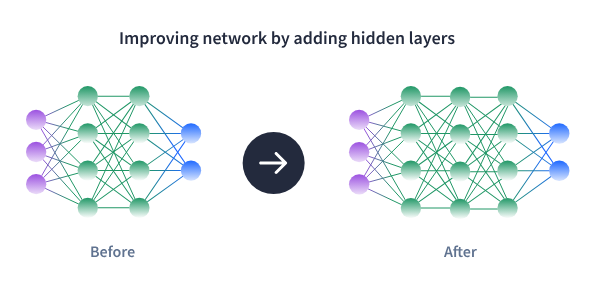

**Optimizing no of nodes per layer**

Prediction on test set by varying no of nodes in each of the 5 dense layers:
* 3 nodes per dense layers -> 642
* 10 nodes per dense layers -> 627
* 100 nodes per dense layers -> 483
* 500 nodes per dense layers -> 471

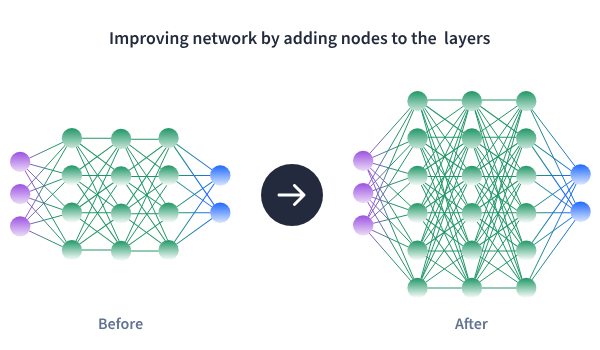

The one with 100 nodes per layer produces good result while training under 3 seconds. However using 100's of nodes to train data with 11 features is...

**Optimizing RNN via Loss Function and Optimizer**

Prediction on test set: (SimpleRNN, 1 Dense Layer)
* Adam + MSE: 3248
* RMSprop + MSE: 2681
* **SGD + MSE: 503**
* Adam + MAE: 2928
* Adam + BinaryCrossentropy: 3149

## Advanced RNN Architecture

* LSTM models were originally developed **to address The Vanishing Gradient** Problem by incorporating a "memory cell" that can maintain information in memory for long periods of time, making them more suitable for tasks where the model needs to learn from context that spans many steps, such as language modeling and translation.
* The problem with simple RNN models is that, as networks become deeper, the influence of a given input on the hidden layers, and ultimately the output, tends to either decay to 0 or blow up exponentially as it cycles through the recurrence process. This problem compounds with longer sequences.
* To address this problem, gated RNNs were introduced, which include gates inside the nodes that determine what information to retain and what to forget. LSTM models and GRUs are two examples of gated RNNs.

### LSTM

**LSTM**

* An LSTM has three gates: input, output, and forget.

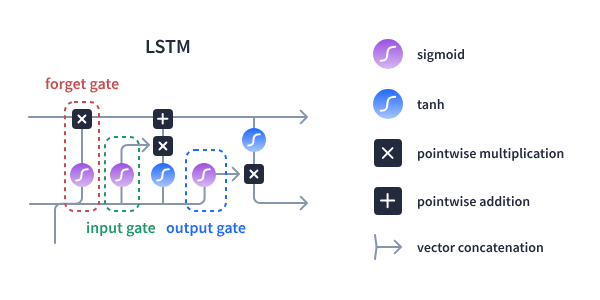

* The **forget gate** is the first step in the process, and determines what information from the network's memory so far should be forgotten in light of the new information that comes in at each step.
* The **input gate** is then responsible for determining what from the new information that is coming in should be stored in memory.
* Finally, the **output gate** takes into account both the memory and the new information to determine what information should be passed along to the next step.
* `input_shape`=`(time_steps, no_features)`; in case of IMDB dataset where each input is preprocessed to have 200 words, `time_steps`=200 and `no_features` equals the dimensionality of each word. (say 32, 300, 768)

In [ ]:
model = tf.keras.Sequential()
model.add(layers.LSTM(3, input_shape=(200,32)))
model.add(layers.Dense(3, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))
model.compile(optimizer='sgd', loss='BinaryCrossentropy')
model.summary()

### GRU

**GRU**

* GRUs only have two gates: reset and update.
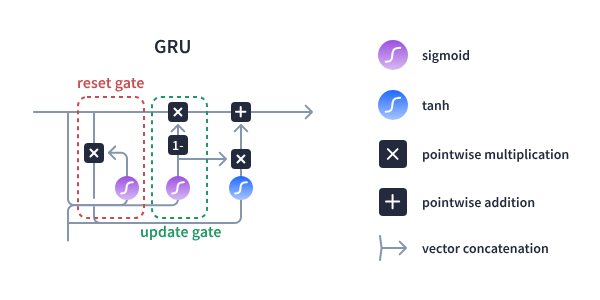

* As with LSTM, the gates in the GRU are for controlling what old information gets dropped from memory as new information comes in (**reset gate**) and what new information gets passed along and/or stored in memory (**update gate**).
* In general, because GRUs have a simpler architecture (fewer gates) than LSTM, they use less memory and tend to run faster. That being said, LSTM may be more accurate when used on longer sequences.

### Embedding Layer

* This layer enables us to represent the words in our data as fixed-length n-dimensional vectors that can extract meaning and context from our text. This layer learns to map integers (which represent words) to dense vectors (called embeddings) such that the semantic relationships between words are captured in the geometric relationships between the vectors.
* It does this **based on the context** in which words (or more precisely, their integer representations) appear in our data.

* By encoding the data as vectors (embeddings) the embedding layer is able to place **related words closer together in a multi-dimensional space** which enables the model to extract meaning and context from a sequence of words.

* Embedding layers are most commonly used with text data, which is why we are using one here. Since the text data will be encoded as dense vectors before being fed into the other layers, the embedding layer will be the first layer in our model.
* This means that the shape of our data and how it was integer encoded should be taken into account when we're creating this layer. Specifically, we'll need to know the total size of the vocabulary used to encode words as unique integers and the length of the sequences.

The syntax for the layer is:

In [ ]:
model.add(layers.Embedding(input_dim, output_dim, input_length))

* `input_dim`: This is an integer defining the size of the vocabulary, i.e., the maximum integer index + 1. For example, if our data is integer-encoded with values between 0 and 9999, input_dim should be set to 10000.

* `output_dim`: This is an integer that defines the size of the dense vector that each word will be transformed into. It sets the size of the embedding space. For instance, if output_dim is set to 64, each word will be represented as a 64-dimensional vector.

* `input_length`: This is the length of input sequences (timesteps) being fed into the model.

In [ ]:
# for imdb dataset having vocab_size=25000

model = tf.keras.Sequential()
model.add(layers.Embedding(input_dim=25000, output_dim=32, input_length=X_train.shape[1]))
model.add(layers.LSTM(3))
model.add(layers.Dense(3, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))
model.compile(optimizer='sgd', loss='BinaryCrossentropy')
model.summary()

model.fit(X_train, y_train)

y_pred = model.predict(X_test)

from sklearn.metrics import accuracy_score
print(accuracy_score(np.round(y_pred), y_test))

There are a number of different ways to experiment to try to improve the performance of our model. Some of these include:

* Number of hidden layers
* Number of nodes per hidden layer
* Activation function used (or not) at each layer
* Optimizer
* Loss function
* Memory - Length of sequences (timesteps)

### Convolutional Layers

* CNN's are typically used in computer vision applications such as: image classification, object detection, facial recognition, and video processing.

* Although not as common, CNNs can also be used for Natural Language Processing (NLP) tasks, like document classification or sentiment analysis. The reason for this is that a document (or any piece of text) can be represented as a 2D image, where the x-axis could be the different words in the text, and the y-axis could be the embedding dimensions.

* To help reduce the dimensionality of the data, we typically follow a convolutional layer with a pooling layer, as shown below:

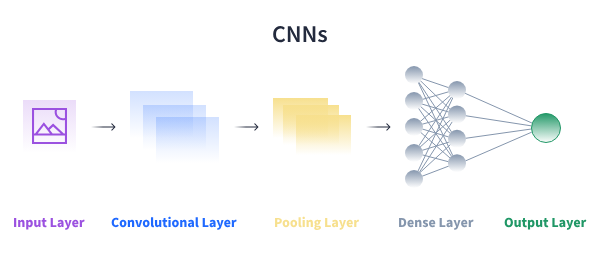



* In an RNN model, a convolutional layer applies filters to sequential input, extracting features from each sequence window. This allows the model to detect spatial and temporal patterns, integrating local information from previous steps, enhancing the RNN's ability to process sequences like text or time-series data.

* Additionally, although not strictly required, we often use pooling layers in conjunction with convolutional layers to reduce the chance of overfitting, and to improve training efficiency.

In [ ]:
import numpy as np
from sklearn.metrics import accuracy_score

X_train_prep = np.loadtxt('imdb_X_train_prep.csv', delimiter=',')
X_test_prep = np.loadtxt('imdb_X_test_prep.csv', delimiter=',')
y_train_prep = np.loadtxt('imdb_y_train_prep.csv', delimiter=',')
y_test_prep = np.loadtxt('imdb_y_test_prep.csv', delimiter=',')

model = Sequential()
model.add(layers.Embedding(input_dim=25000, output_dim=16, input_length=X_train_prep.shape[1]))
model.add(layers.Conv1D(filters=1, kernel_size=1, activation='relu'))
model.add(layers.MaxPooling1D())
model.add(layers.LSTM(5))
model.add(layers.Dense(1, activation='sigmoid'))
model.compile(optimizer='adam', loss='binary_crossentropy')
model.summary()

model.fit(X_train_prep , y_train_prep )

y_pred = model.predict(X_test_prep)
print(accuracy_score(np.round(y_pred), y_test_prep))  #-> 0.76

To optimize, we can change any of the following:

* Number of hidden layers
* Number of nodes per hidden layer
* Embedding dimension: try using a power of 2 less than or equal to 64.
* Number of filters on the convolutional layer: try using a power of 2 no greater than 256.
* Kernel size on the convolutional layer: try using an odd number less than or equal to 9.
* Activation function used (or not) at each layer: leave Sigmoid as the activation function for the output layer.
* Optimizer: not all optimizers will work; if you get an error, try another optizer.
* Loss function: not all loss functions will work; if you get an error, try another loss function.

### Time Series Forecasting

RNNs take sequential data segmented into windows (sequences) of a specified size for the variable `sequence_length`.

In [ ]:
import pandas as pd
import numpy as np

def create_dataset(orig_dataset, window_size=1):
    data_x, data_y = [], []
    for i in range(len(orig_dataset) - window_size - 1):
        window = orig_dataset.iloc[i:(i + window_size), 0]
        target = orig_dataset.iloc[i + window_size, 0]     # this is the datapoint that immediately follows the window
        data_x.append(window)
        data_y.append(target)
    return np.array(data_x), np.array(data_y)

In [ ]:
train = pd.read_csv('cinema_data_train.csv', index_col=0) # index_col=0 to use date column as the index
test = pd.read_csv('cinema_data_test.csv', index_col=0)

In [ ]:
window_size=1 # We're effectively asking it to make predictions of ticket sales (one day in the future) based only on the previous day's ticket sales.
X_train, y_train = create_dataset(train, window_size)
X_test, y_test = create_dataset(test, window_size)

# reshaping to 3D to accomodate for RNN
X_train = np.reshape(X_train, (X_train.shape[0],1,X_train.shape[1]))
X_test = np.reshape(X_test, (X_test.shape[0],1,X_test.shape[1]))

In [ ]:
import tensorflow as tf
from tensorflow.keras import Sequential, layers

model = Sequential()
model.add(layers.SimpleRNN(10, input_shape=(1, window_size), activation='relu'))
model.add(layers.Dense(10, activation='relu'))
model.add(layers.Dense(1))
model.compile(optimizer='adam', loss='mean_squared_error')
model.summary()

model.fit(X_train, y_train)

* Since we're working with a time series forecasting problem, we've scaled the target variable itself (total_sales), as this variable ultimately ends up being both input and output of our model, just at different time periods.
* As a result, a metric like Mean Squared Error might be less useful to us from the standpoint of human readability, as it is no longer on the same scale as the original data.
* Consequently, we're going to make use of the R-Squared metric instead, since this is a more comparable metric between different datasets and therefore makes it easier for us to interpret whether we have an overall "good forecast" or "not so good forecast."

In [ ]:
y_pred = model.predict(X_test)

from sklearn.metrics import r2_score
print(r2_score(y_test, y_pred))  # -> -2.6244

*  R Squared can be negative if we are using it outside the context of a linear regression that it was initially designed for and the predictions are doing worse than simply predicting the mean of the dataset.
* In any case, it is a clear indication of a very poor fit.

In [ ]:
# LSTM instead of SimpleRNN

model = Sequential()
model.add(layers.LSTM(10, input_shape=(1, window_size), activation='relu'))
model.add(layers.Dense(10, activation='relu'))
model.add(layers.Dense(1))
model.compile(optimizer='adam', loss='mean_squared_error')
model.summary()

model.fit(X_train, y_train)

from sklearn.metrics import r2_score
y_pred = model.predict(X_test)
print(r2_score(y_test, y_pred))  # -> -1.76325

* Not that much result improvement - not suprising.
* The strength of these models comes from their ability to "remember" previous data, and our `window_size` of 1 means that the model is only given one previous datapoint to work with.

Consider changing some or all of the following:

* Window size
* Number of hidden layers
* Number of nodes per hidden layer
* Type of recurrent layer (SimpleRNN, LSTM, GRU)
* Activation function used (or not) at each layer
* Optimizer
* Loss function